# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [4]:
x_train = train_datagen.flow_from_directory(r"C:\Users\OMNR 1\Desktop\ASSIGNMENT\flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

In [8]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(300, activation = "relu"))

In [11]:
model.add(Dense(150, activation = "relu")) #mulitple dense layers

In [12]:
model.add(Dense(5, activation = "softmax")) #output layer

In [13]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

In [14]:
len(x_train)

44

In [15]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 69s 1s/step - loss: 1.6090 - accuracy: 0.3804
Epoch 2/15
44/44 [==============================] - 42s 958ms/step - loss: 1.1642 - accuracy: 0.5161
Epoch 3/15
44/44 [==============================] - 46s 1s/step - loss: 1.0920 - accuracy: 0.5578
Epoch 4/15
44/44 [==============================] - 53s 1s/step - loss: 1.0434 - accuracy: 0.5930
Epoch 5/15
44/44 [==============================] - 52s 1s/step - loss: 1.0008 - accuracy: 0.6027
Epoch 6/15
44/44 [==============================] - 50s 1s/step - loss: 0.9564 - accuracy: 0.6282
Epoch 7/15
44/44 [==============================] - 51s 1s/step - loss: 0.9299 - accuracy: 0.6382
Epoch 8/15
44/44 [==============================] - 47s 1s/step - loss: 0.9195 - accuracy: 0.6470
Epoch 9/15
44/44 [==============================] - 47s 1s/step - loss: 0.8566 - accuracy: 0.6688
Epoch 10/15
44/44 [==============================] - 47s 1s/step - loss: 0.8373 - accuracy: 0.6685
Epoch 11/15
44/4

In [16]:
model.save("flowers.h5")

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [18]:
model = load_model("flowers.h5")

In [35]:
img = image.load_img("F:\\any2.jpg", target_size = (64,64) )

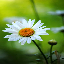

In [36]:
img

In [37]:
x = image.img_to_array(img)

In [38]:
x.ndim

3

In [39]:
x = np.expand_dims(x,axis = 0)

In [48]:
x.ndim

4

In [49]:
pred = model.predict(x)

1/1 [==============================] - 0s 47ms/step


In [50]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [51]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']

In [52]:
labels[np.argmax(pred)]

'daisy'